In [19]:
import numpy as np # linear algebra
import pandas as pd 
import json
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score,recall_score,precision_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 

import keras
from keras.utils.np_utils import to_categorical
import cv2
from sklearn.svm import SVC
np.random.seed(42)

In [2]:
ROOT_DIR = 'driver_detection/'
TRAIN_DIR = ROOT_DIR + 'imgs/train/'
driver_imgs_list = pd.read_csv(ROOT_DIR + "driver_imgs_list.csv")
sample_submission = pd.read_csv(ROOT_DIR + "sample_submission.csv")
random_list = np.random.permutation(len(driver_imgs_list))
df_copy = driver_imgs_list.iloc[random_list]
image_paths = [TRAIN_DIR+row.classname+'/'+row.img 
                   for (index, row) in df_copy.iterrows()]
label_list = [int(row.classname[1]) for (index, row) in df_copy.iterrows()]

In [3]:
x_img_path = np.array(image_paths)
dataset = []
for i in range(len(x_img_path)):
    img = mpimg.imread(x_img_path[i]) 
    img = cv2.resize(img,(160,120))
    dataset.append([img,label_list[i]])
dataset = np.transpose(dataset)

/Users/joyyang/miniforge3/envs/py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


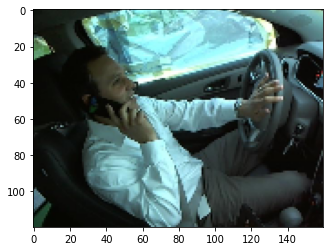

In [4]:
data = np.array(dataset[:][0])
plt.imshow(data[0])

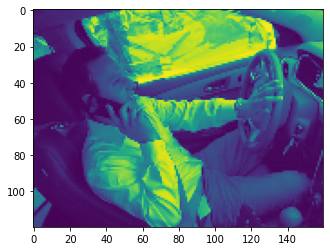

In [5]:
data_gray = []
for i in data:
    data_gray.append(color.rgb2gray(i))
plt.imshow(data_gray[0])

In [6]:
ppc = 16
hog_images = []
hog_features = []
for image in data_gray:
    fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualize=True)
    hog_images.append(hog_image)
    hog_features.append(fd)

In [8]:
labels = np.array(dataset[:][1])

In [9]:
hog_features = np.array(hog_features)
data_frame = []
for i in range(len(hog_features)):
    data_frame.append(np.hstack((hog_features[i],labels[i]))) 

np.random.shuffle(data_frame)

In [10]:
percentage = 70
partition = int(len(data)*percentage/100)

In [11]:
data_frame = np.array(data_frame)
x_train, x_test = data_frame[:partition,:-1],  data_frame[partition:,:-1]
y_train, y_test = data_frame[:partition:,-1].ravel() , data_frame[partition:,-1].ravel()

clf = LogisticRegression(penalty="l1", C=0.5, solver="liblinear")
clf1 = SVC()
clf.fit(x_train,y_train)
clf1.fit(x_train,y_train)

SVC()

In [12]:
y_pred = clf.predict(x_test)
y_pred1 = clf1.predict(x_test)

### Logistic Regression Result

In [20]:
print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print("Precision: "+str(precision_score(y_test, y_pred,average = 'macro')))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.9421819262782402
Precision: 0.948928392449051


              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92       735
         1.0       0.93      0.97      0.95      1368
         2.0       0.91      0.97      0.94      1351
         3.0       0.99      0.98      0.98       699
         4.0       0.96      0.94      0.95       697
         5.0       0.97      0.98      0.98       612
         6.0       0.96      0.86      0.91       585
         7.0       0.94      0.88      0.91       681

    accuracy                           0.94      6728
   macro avg       0.95      0.93      0.94      6728
weighted avg       0.94      0.94      0.94      6728



In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusMatrix = confusion_matrix(y_test, y_pred)

In [23]:
confusMatrix

array([[ 669,   29,   11,    0,    0,    4,    4,   18],
       [   7, 1321,   34,    0,    3,    1,    0,    2],
       [   2,   15, 1313,    3,    6,    2,    3,    7],
       [   6,    2,    5,  683,    1,    1,    0,    1],
       [   1,   24,   16,    0,  652,    2,    2,    0],
       [   1,    1,    6,    0,    4,  599,    1,    0],
       [  12,    7,   32,    2,   14,    5,  501,   12],
       [  18,   22,   23,    2,    2,    2,   11,  601]])

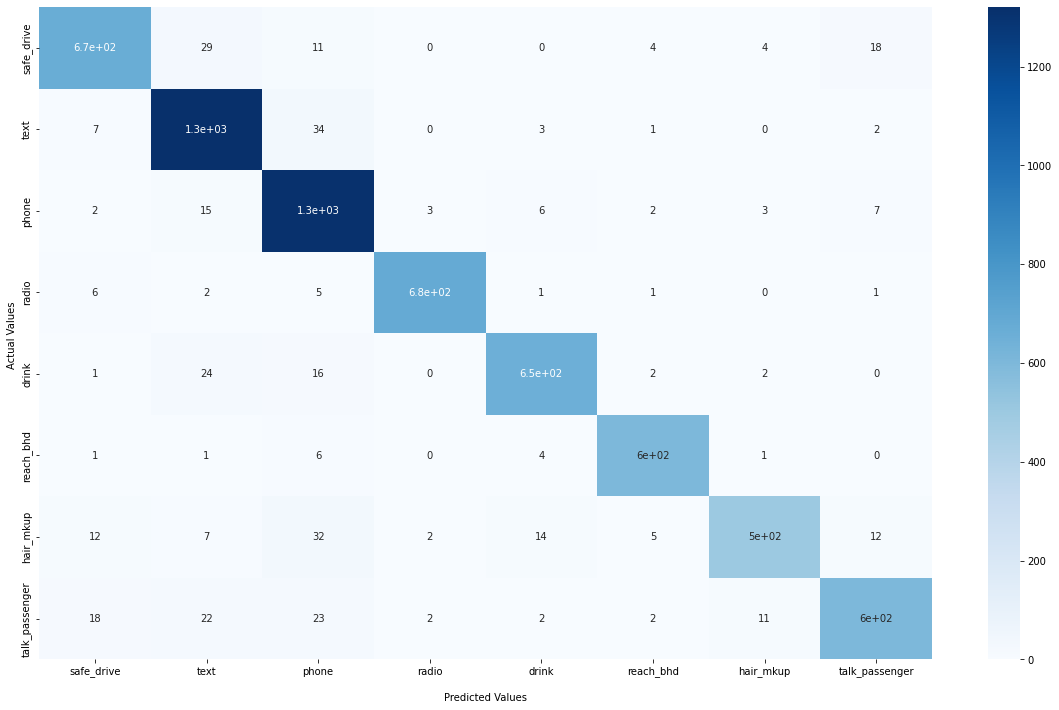

In [24]:
import seaborn as sns
plt.figure(figsize=(20, 12))
ax = sns.heatmap(confusMatrix, annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['safe_drive', 'text', 'phone', 'radio', 'drink', 'reach_bhd', 'hair_mkup', 'talk_passenger'])
ax.yaxis.set_ticklabels(['safe_drive', 'text', 'phone', 'radio', 'drink', 'reach_bhd', 'hair_mkup', 'talk_passenger'])

## Display the visualization of the Confusion Matrix.
plt.show()

### SVM Result

In [25]:
print("Accuracy: "+str(accuracy_score(y_test, y_pred1)))
print("Precision: "+str(precision_score(y_test, y_pred1,average = 'macro')))
print('\n')
print(classification_report(y_test, y_pred1))

Accuracy: 0.9916765755053508
Precision: 0.9913413971063628


              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       735
         1.0       0.99      1.00      0.99      1368
         2.0       1.00      1.00      1.00      1351
         3.0       1.00      0.99      0.99       699
         4.0       0.99      0.99      0.99       697
         5.0       1.00      1.00      1.00       612
         6.0       0.99      0.98      0.98       585
         7.0       0.98      0.99      0.98       681

    accuracy                           0.99      6728
   macro avg       0.99      0.99      0.99      6728
weighted avg       0.99      0.99      0.99      6728



In [26]:
confusMatrix1 = confusion_matrix(y_test, y_pred1)

In [27]:
confusMatrix1

array([[ 719,    8,    1,    0,    0,    1,    0,    6],
       [   0, 1366,    1,    0,    0,    0,    0,    1],
       [   0,    0, 1346,    0,    1,    0,    4,    0],
       [   6,    0,    2,  691,    0,    0,    0,    0],
       [   0,    4,    0,    0,  693,    0,    0,    0],
       [   0,    1,    0,    0,    1,  610,    0,    0],
       [   0,    1,    0,    0,    3,    0,  572,    9],
       [   0,    1,    0,    0,    1,    0,    4,  675]])

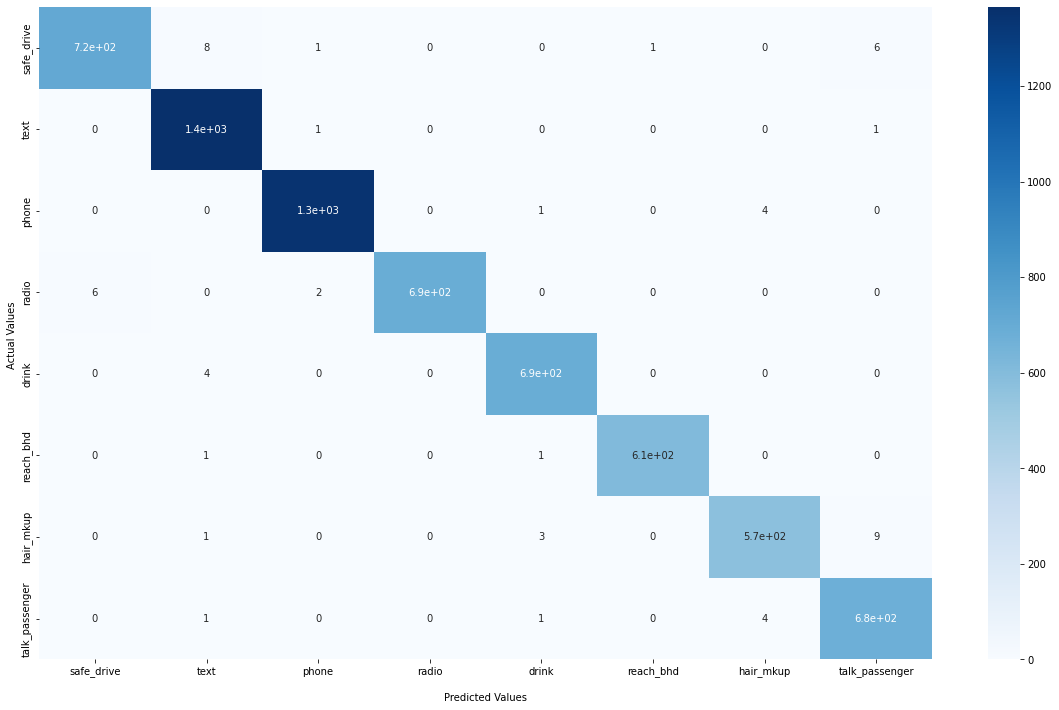

In [28]:
import seaborn as sns
plt.figure(figsize=(20, 12))
ax = sns.heatmap(confusMatrix1, annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['safe_drive', 'text', 'phone', 'radio', 'drink', 'reach_bhd', 'hair_mkup', 'talk_passenger'])
ax.yaxis.set_ticklabels(['safe_drive', 'text', 'phone', 'radio', 'drink', 'reach_bhd', 'hair_mkup', 'talk_passenger'])

## Display the visualization of the Confusion Matrix.
plt.show()